In [18]:


import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
cancer = load_breast_cancer()
print
print len(cancer)
print
print type(cancer)
print
print cancer.data.shape
print
print cancer.target.shape


5

<class 'sklearn.utils.Bunch'>

(569L, 30L)

(569L,)


In [20]:
X = cancer.data
y = cancer.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
# normalize the data
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
predictions = mlp.predict(X_test)

In [26]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[49  0]
 [ 2 92]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        49
          1       1.00      0.98      0.99        94

avg / total       0.99      0.99      0.99       143



In [27]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),alpha=5.0, max_iter=500)
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=5.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [28]:
print "train accuracy: ", clf.score(X_train, y_train)
print "test accuracy: ", clf.score(X_test, y_test)
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

train accuracy:  0.978873239437
test accuracy:  0.972027972028
[[45  4]
 [ 0 94]]
             precision    recall  f1-score   support

          0       1.00      0.92      0.96        49
          1       0.96      1.00      0.98        94

avg / total       0.97      0.97      0.97       143



Text(0,0.5,u'Accuracy')

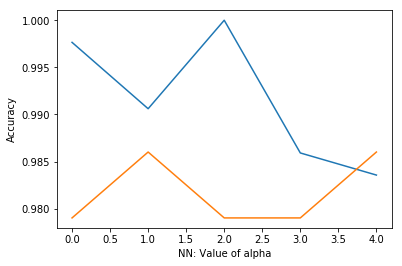

In [29]:
# try different alpha sizes and record training and testing accuracy
alphas = [.001,.01,.1,1.0,5.0]
ylims = [0,1,2,3,4]
train_scores = []
test_scores = []
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(100,100),alpha=alpha, max_iter=500)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of alpha')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

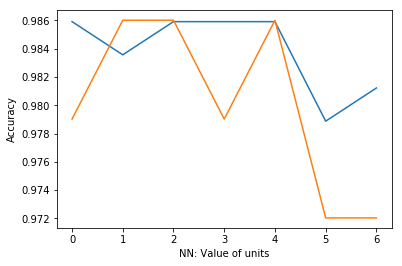

In [30]:
# try different unit sizes and record training and testing accuracy
units = [1, 10, 50, 100, 300, 500, 1000]
ylims = [0,1,2,3,4,5,6]
train_scores = []
test_scores = []
for unit in units:
    clf = MLPClassifier(hidden_layer_sizes=[unit],alpha=1.0, max_iter=3000)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of units')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

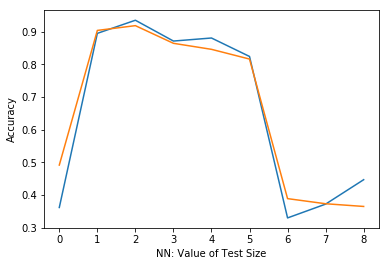

In [31]:
# try different test sizes and record training and testing accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between test size and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of Test Size')
plt.ylabel('Accuracy')

In [32]:
###### HOLDOUT ########

# Holdout 20%
X = cancer.data
y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [67.481662591687041, 92.307692307692307, 74.213836477987414, 85.347985347985343, 89.427312775330392, 42.307692307692307, 55.147058823529413, 28.571428571428569, 28.888888888888886]

cv accuracy:  [76.817073170731717, 83.031847637110801, 71.798326001955033, 76.667684167684172, 63.339920948616601, 56.181630546955631, 63.018315018315029, 52.416666666666664, 53.166666666666664]



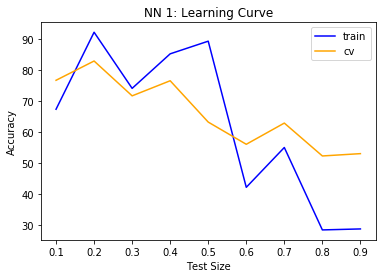

In [33]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('NN 1: Learning Curve')
plt.legend()

train accuracy:  [63.343108504398828, 33.137829912023456, 70.967741935483872, 80.645161290322577, 90.029325513196483, 87.390029325513197, 83.284457478005862]

cv accuracy:  [66.311688311688329, 62.311942959001776, 49.087853323147428, 71.278329513623646, 82.753501400560211, 83.550292844410492, 85.169595110771581]



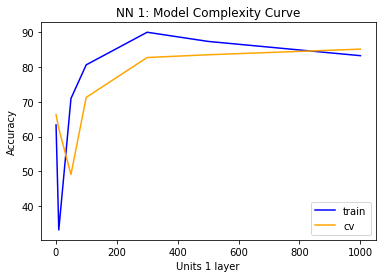

In [34]:
###### Model Complexity ########

# try units and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
units = [1, 10, 50, 100, 300, 500, 1000]
train_scores = []
test_scores = []
cv_scores = []
for unit in units:
    clf = MLPClassifier(hidden_layer_sizes=[unit],alpha=1.0, max_iter=3000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(units, train_scores, color='blue', label='train')
plt.plot(units, cv_scores, color='orange', label='cv')
plt.xlabel('Units 1 layer')
plt.ylabel('Accuracy')
plt.title('NN 1: Model Complexity Curve')
plt.legend()

In [35]:
##### Test Model On Holdout Group  #####

clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.853
Accuracy on the test subset: 0.807
[[36  6]
 [16 56]]


In [36]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

In [37]:
###########  image segmentation  ########

In [38]:
import pandas as pd
data = pd.read_csv('C:/Users/443966/Desktop/image_segmentation_1.csv')
print data.shape
#print data.head()

#X = data['REGION-CENTROID-COL':'HUE-MEAN']
X = data[data.columns.difference(['CLASS'])]
y = data['CLASS']

print X.shape
print y.shape

(2310, 20)
(2310, 19)
(2310L,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [40]:
# normalize the data
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [43]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[66  0  0  0  1  0  0]
 [ 0 79  0  0  0  0  0]
 [ 0  0 73  0 10  0  0]
 [ 0  0  1 66  5  0  0]
 [ 1  0 11  2 91  0  0]
 [ 0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0 84]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99        67
          2       1.00      1.00      1.00        79
          3       0.86      0.88      0.87        83
          4       0.97      0.92      0.94        72
          5       0.85      0.87      0.86       105
          6       1.00      1.00      1.00        88
          7       1.00      1.00      1.00        84

avg / total       0.95      0.95      0.95       578



In [44]:
clf = MLPClassifier(hidden_layer_sizes=(100,100),alpha=1.0, max_iter=500)
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1.0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [45]:
print "train accuracy: ", clf.score(X_train, y_train)
print "test accuracy: ", clf.score(X_test, y_test)
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

train accuracy:  0.969976905312
test accuracy:  0.939446366782
[[66  0  0  0  1  0  0]
 [ 0 79  0  0  0  0  0]
 [ 0  0 78  1  4  0  0]
 [ 0  0  0 67  5  0  0]
 [ 1  0 21  2 81  0  0]
 [ 0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0 84]]
             precision    recall  f1-score   support

          1       0.99      0.99      0.99        67
          2       1.00      1.00      1.00        79
          3       0.79      0.94      0.86        83
          4       0.96      0.93      0.94        72
          5       0.89      0.77      0.83       105
          6       1.00      1.00      1.00        88
          7       1.00      1.00      1.00        84

avg / total       0.94      0.94      0.94       578



Text(0,0.5,u'Accuracy')

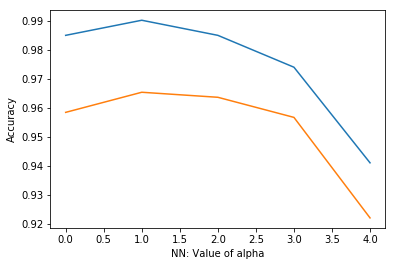

In [46]:
# try different test sizes and record training and testing accuracy
alphas = [.001,.01,.1,1.0,5.0]
ylims = [0,1,2,3,4]
train_scores = []
test_scores = []
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=(100,100),alpha=alpha, max_iter=500)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of alpha')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

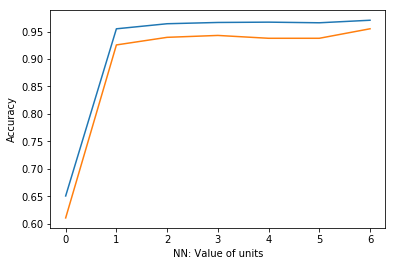

In [47]:
# try different test sizes and record training and testing accuracy
units = [1, 10, 50, 100, 300, 500, 1000]
ylims = [0,1,2,3,4,5,6]
train_scores = []
test_scores = []
for unit in units:
    clf = MLPClassifier(hidden_layer_sizes=[unit],alpha=1.0, max_iter=3000)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between K and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of units')
plt.ylabel('Accuracy')

Text(0,0.5,u'Accuracy')

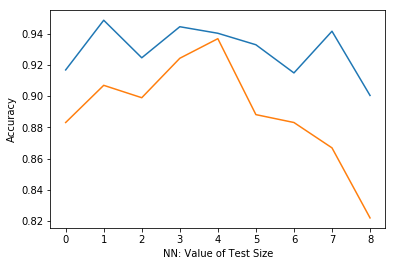

In [48]:
# try different test sizes and record training and testing accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X_train,y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
# plot the relationship between test size and testing accuracy
plt.plot(ylims, train_scores, test_scores)
plt.xlabel('NN: Value of Test Size')
plt.ylabel('Accuracy')

In [49]:
###### HOLDOUT ########

# Holdout 20%
X = cancer.data
y = cancer.target
X, X_test_holdout, y, y_test_holdout = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

train accuracy:  [79.951100244498775, 74.72527472527473, 78.616352201257868, 91.575091575091577, 82.378854625550659, 34.065934065934066, 36.029411764705884, 38.461538461538467, 40.0]

cv accuracy:  [84.859756097560975, 77.950450450450461, 76.217008797653961, 76.399063899063904, 63.305335968379438, 66.929824561403507, 51.630036630036635, 67.027777777777786, 55.000000000000007]



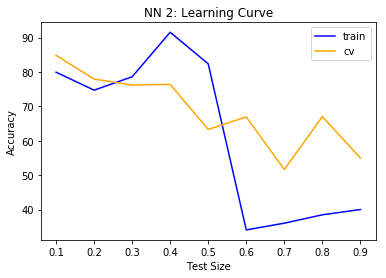

In [50]:
##### Learning Curve########

# try different test sizes and record training and testing and cv accuracy
test_size = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
ylims = [0,1,2,3,4,5,6,7,8]
train_scores = []
test_scores = []
cv_scores = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=1.0, max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)
    
print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(test_size, train_scores, color='blue', label='train')
plt.plot(test_size, cv_scores, color='orange', label='cv')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('NN 2: Learning Curve')
plt.legend()

train accuracy:  [64.222873900293251, 22.287390029325511, 56.011730205278589, 35.777126099706749, 65.982404692082113, 87.390029325513197, 93.841642228739005]

cv accuracy:  [64.229182582123755, 58.575248281130634, 50.669977081741791, 76.271199388846455, 68.721670486376368, 90.32722179781004, 82.679653679653683]



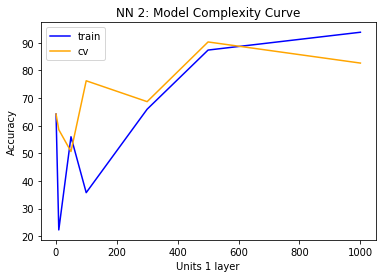

In [51]:
###### Model Complexity ########

# try units and record training and testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y)
units = [1, 10, 50, 100, 300, 500, 1000]
train_scores = []
test_scores = []
cv_scores = []
for unit in units:
    clf = MLPClassifier(hidden_layer_sizes=[unit],alpha=1.0, max_iter=3000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_scores.append(clf.score(X_train, y_train)*100)
    test_scores.append(clf.score(X_test, y_test)*100)
    cv = cross_val_score(clf, X_train, y_train, cv=10)
    cv_mean = np.array(cv).mean() * 100
    cv_scores.append(cv_mean)

print "train accuracy: ", train_scores
print
#print test_scores
#print
print "cv accuracy: ", cv_scores
print

plt.plot(units, train_scores, color='blue', label='train')
plt.plot(units, cv_scores, color='orange', label='cv')
plt.xlabel('Units 1 layer')
plt.ylabel('Accuracy')
plt.title('NN 2: Model Complexity Curve')
plt.legend()

In [52]:
##### Test Model On Holdout Group  #####

clf = MLPClassifier(hidden_layer_sizes=(100,10,10), alpha=1.0, max_iter=500)
clf.fit(X, y)

y_pred = clf.predict(X_test_holdout)

print('Accuracy on the training subset: {:.3f}'.format(clf.score(X, y)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_holdout, y_test_holdout)))
print(metrics.confusion_matrix(y_test_holdout, y_pred))

Accuracy on the training subset: 0.919
Accuracy on the test subset: 0.947
[[38  4]
 [ 2 70]]
